In [1]:
# 경고메세지 제거
import warnings
warnings.filterwarnings('ignore')

# library import
import numpy as np
import pandas as pd
import glob

# 시각화 library import
!pip install missingno
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

#한글폰트 오류안나게
import matplotlib.pyplot as plt
from matplotlib import font_manager

font_fname = 'C:\\Windows\\Fonts\\batang.ttc' # 아래한글 함초롱바탕 글꼴
font_family = font_manager.FontProperties(fname=font_fname).get_name()
plt.rcParams['font.family'] = font_family



from mpl_toolkits.mplot3d import Axes3D

from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder
from sklearn.manifold import TSNE


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\HCW\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable


In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [6]:
user = pd.read_csv('회원정보_201812_16columns.csv', encoding='utf-8')
user.head()

,기준년월,발급회원번호,남녀구분코드,연령,VIP등급코드,최상위카드등급코드,회원여부_이용가능,소지여부_신용,소지카드수_유효_신용,입회경과개월수_신용,회원여부_연체,가입통신회사코드,거주시도명,직장시도명,카드신청건수,Life_Stage
0,201812,SYN_0,2,40,7.0,NaN,1,1,1,71,0,LGT,경기,경기,0,5
1,201812,SYN_1,1,30,NaN,1.0,1,1,1,16,0,KTF,서울,서울,0,4
2,201812,SYN_2,2,40,NaN,NaN,1,1,1,6,0,SKT,충남,충남,0,4
3,201812,SYN_3,1,40,NaN,NaN,1,1,2,153,0,SKT,충남,충남,0,4
4,201812,SYN_4,2,40,NaN,NaN,0,1,1,79,0,KTF,부산,부산,0,5


In [7]:
user.shape

(2999184, 16)

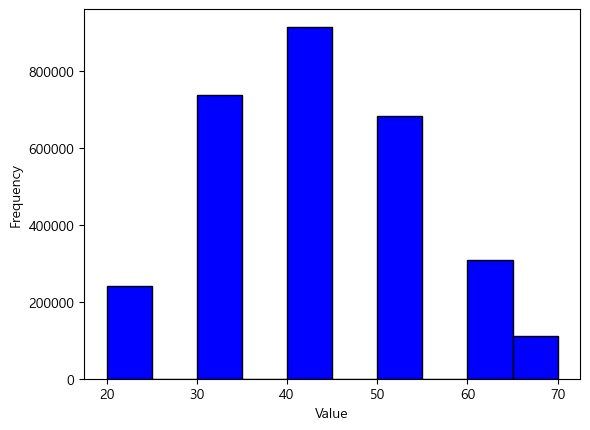

In [8]:
plt.hist(user['연령'], color='blue', edgecolor='black')

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

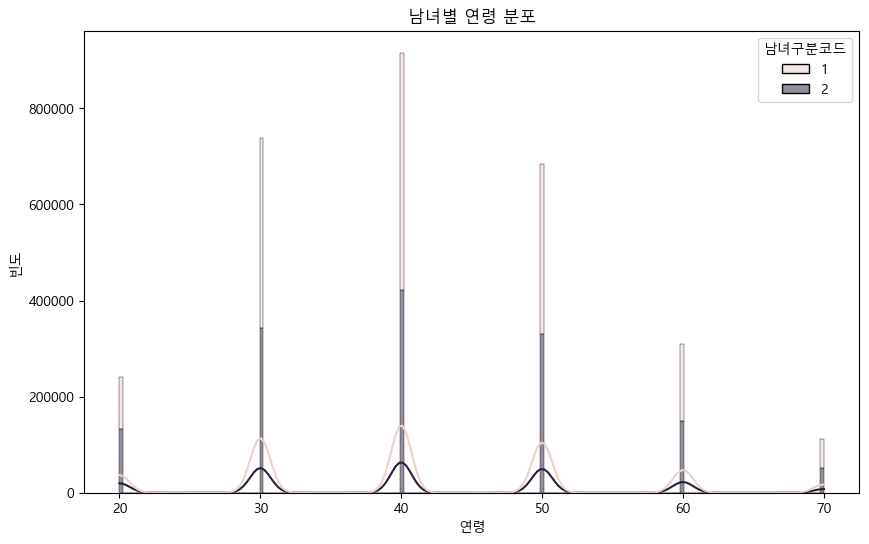

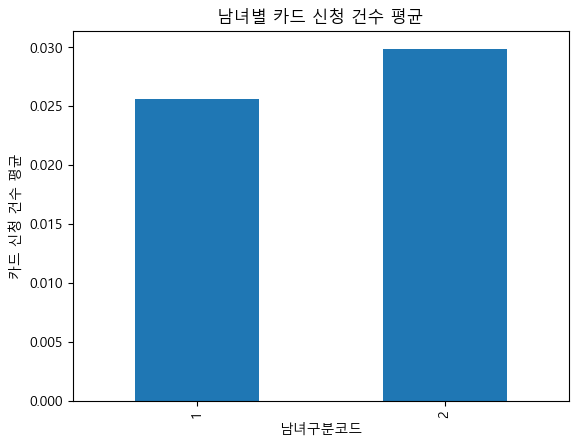

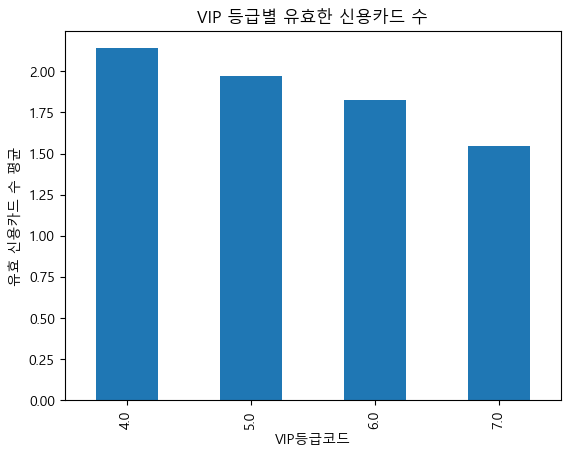

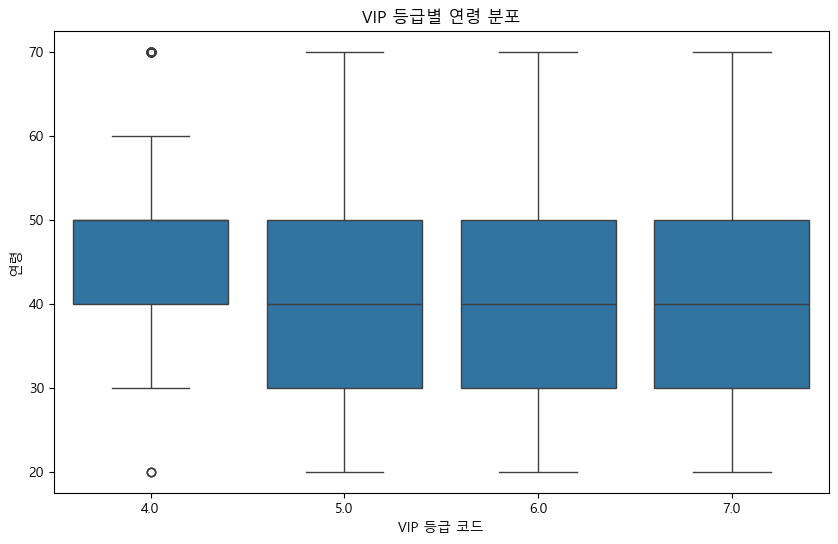

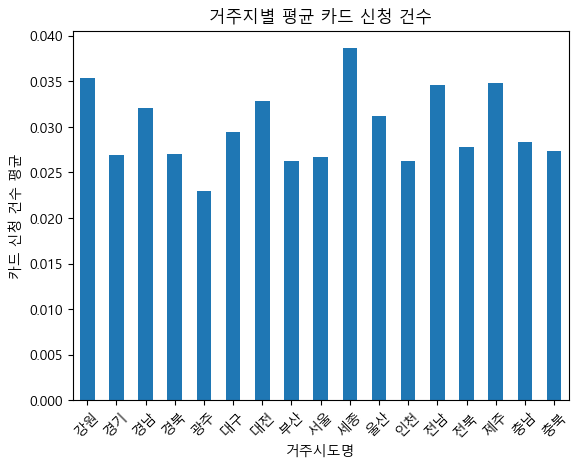

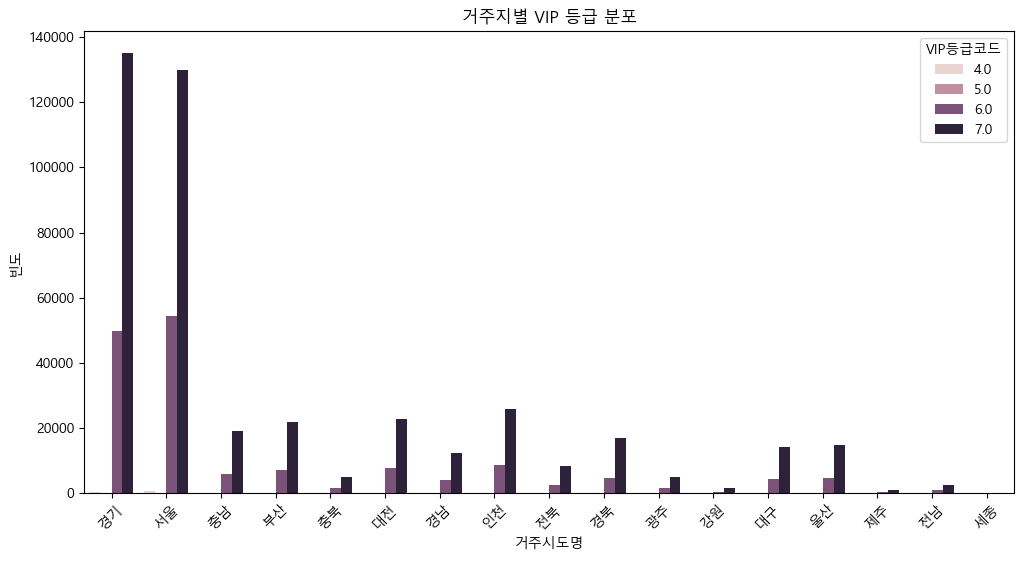

In [9]:

plt.rc('font', family='Malgun Gothic') 

# 1. 남녀별 분석
# 남녀별 연령 분포
plt.figure(figsize=(10, 6))
sns.histplot(data=user, x='연령', hue='남녀구분코드', multiple='stack', kde=True)
plt.title('남녀별 연령 분포')
plt.xlabel('연령')
plt.ylabel('빈도')
plt.show()

# 남녀별 카드 신청 건수 평균
gender_application_mean = user.groupby('남녀구분코드')['카드신청건수'].mean()
gender_application_mean.plot(kind='bar', title='남녀별 카드 신청 건수 평균', ylabel='카드 신청 건수 평균')
plt.xlabel('남녀구분코드')
plt.show()

# 2. VIP 코드별 분석
# VIP 등급별 유효한 신용카드 수
vip_card_count_mean = user.groupby('VIP등급코드')['소지카드수_유효_신용'].mean()
vip_card_count_mean.plot(kind='bar', title='VIP 등급별 유효한 신용카드 수', ylabel='유효 신용카드 수 평균')
plt.xlabel('VIP등급코드')
plt.show()

# VIP 등급별 연령 분포
plt.figure(figsize=(10, 6))
sns.boxplot(data=user, x='VIP등급코드', y='연령')
plt.title('VIP 등급별 연령 분포')
plt.xlabel('VIP 등급 코드')
plt.ylabel('연령')
plt.show()

# 3. 거주지별 분석
# 거주지별 평균 카드 신청 건수
region_application_mean = user.groupby('거주시도명')['카드신청건수'].mean()
region_application_mean.plot(kind='bar', title='거주지별 평균 카드 신청 건수', ylabel='카드 신청 건수 평균')
plt.xlabel('거주시도명')
plt.xticks(rotation=45)
plt.show()

# 거주지별 VIP 등급 분포
plt.figure(figsize=(12, 6))
sns.countplot(data=user, x='거주시도명', hue='VIP등급코드')
plt.title('거주지별 VIP 등급 분포')
plt.xlabel('거주시도명')
plt.ylabel('빈도')
plt.xticks(rotation=45)
plt.show()

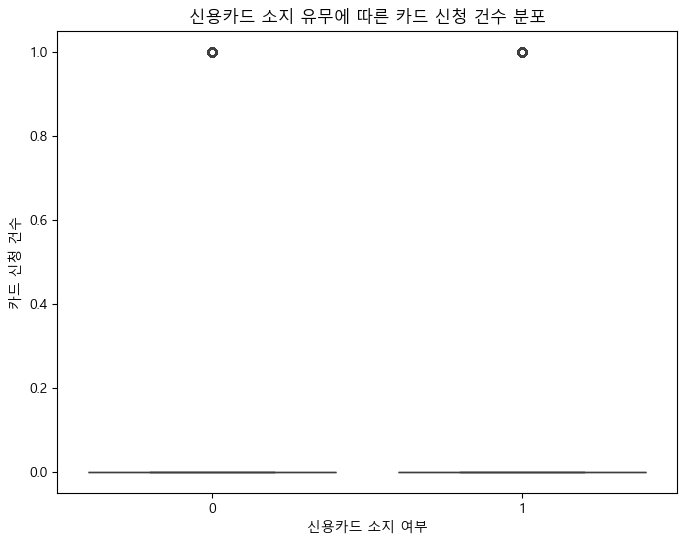

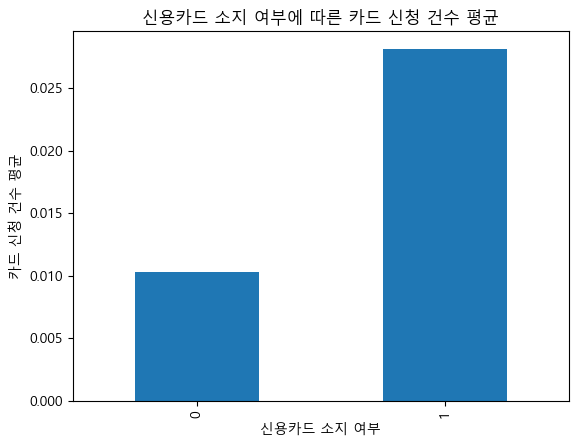

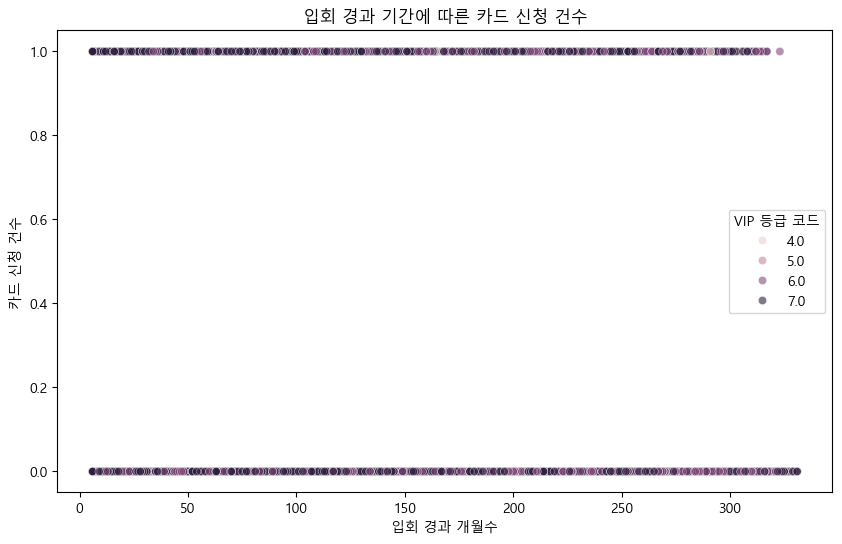

입회 경과 개월수와 카드 신청 건수 간 상관계수: -0.05


In [10]:

plt.rc('font', family='Malgun Gothic') 
# 2. 신용카드 소지 유무에 따른 카드 신청 건수 차이
plt.figure(figsize=(8, 6))
sns.boxplot(data=user, x='소지여부_신용', y='카드신청건수')
plt.title('신용카드 소지 유무에 따른 카드 신청 건수 분포')
plt.xlabel('신용카드 소지 여부')
plt.ylabel('카드 신청 건수')
plt.show()

# 신용카드 소지 여부에 따른 카드 신청 건수 평균
possession_application_mean = user.groupby('소지여부_신용')['카드신청건수'].mean()
possession_application_mean.plot(kind='bar', title='신용카드 소지 여부에 따른 카드 신청 건수 평균', ylabel='카드 신청 건수 평균')
plt.xlabel('신용카드 소지 여부')
plt.show()

# 3. 입회 경과 기간에 따른 카드 신청 건수 경향
plt.figure(figsize=(10, 6))
sns.scatterplot(data=user, x='입회경과개월수_신용', y='카드신청건수', hue='VIP등급코드', alpha=0.6)
plt.title('입회 경과 기간에 따른 카드 신청 건수')
plt.xlabel('입회 경과 개월수')
plt.ylabel('카드 신청 건수')
plt.legend(title='VIP 등급 코드')
plt.show()

# 입회 경과 개월수와 카드 신청 건수 간 상관관계
correlation = user['입회경과개월수_신용'].corr(user['카드신청건수'])
print(f"입회 경과 개월수와 카드 신청 건수 간 상관계수: {correlation:.2f}")

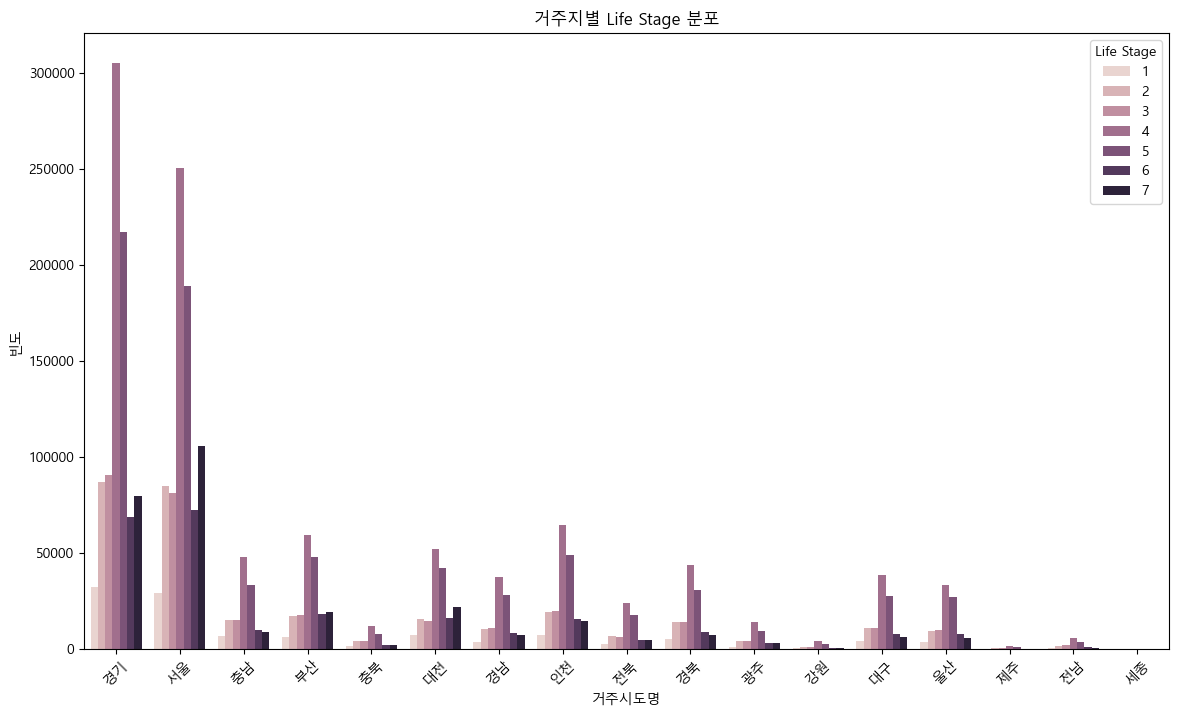

In [11]:
plt.figure(figsize=(14, 8))
sns.countplot(data=user, x='거주시도명', hue='Life_Stage')
plt.title('거주지별 Life Stage 분포')
plt.xlabel('거주시도명')
plt.ylabel('빈도')
plt.xticks(rotation=45)
plt.legend(title='Life Stage')
plt.show()

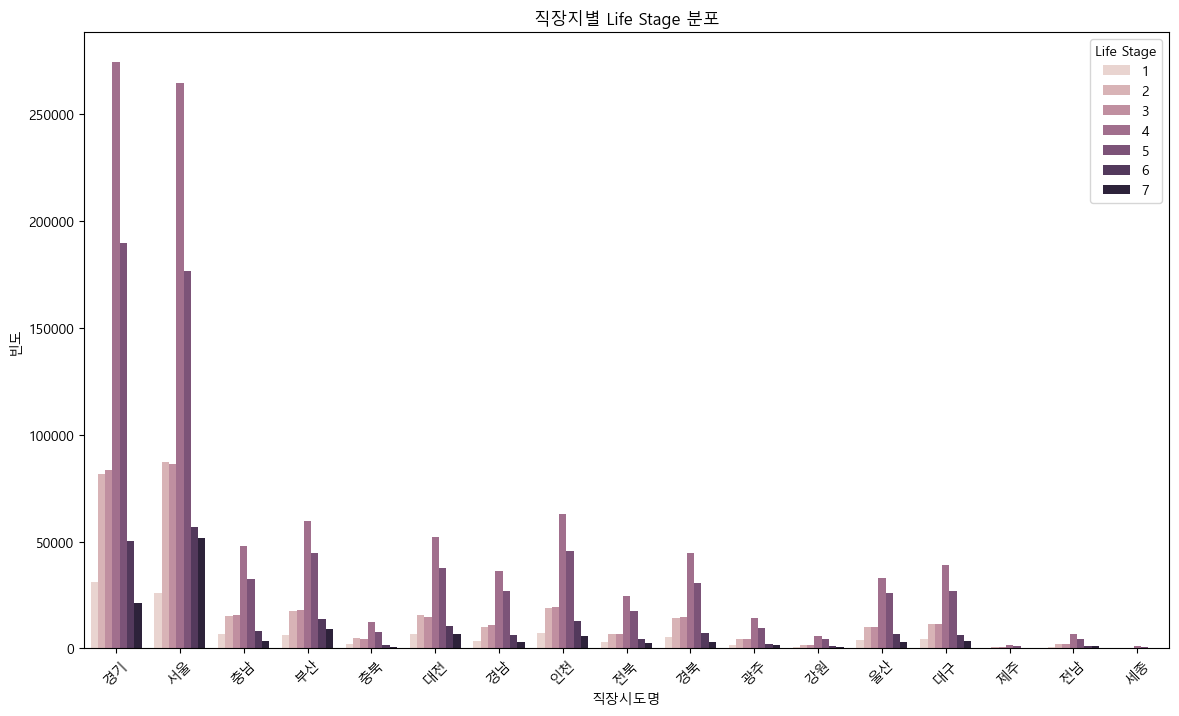

In [12]:
plt.figure(figsize=(14, 8))
sns.countplot(data=user, x='직장시도명', hue='Life_Stage')
plt.title('직장지별 Life Stage 분포')
plt.xlabel('직장시도명')
plt.ylabel('빈도')
plt.xticks(rotation=45)
plt.legend(title='Life Stage')
plt.show()

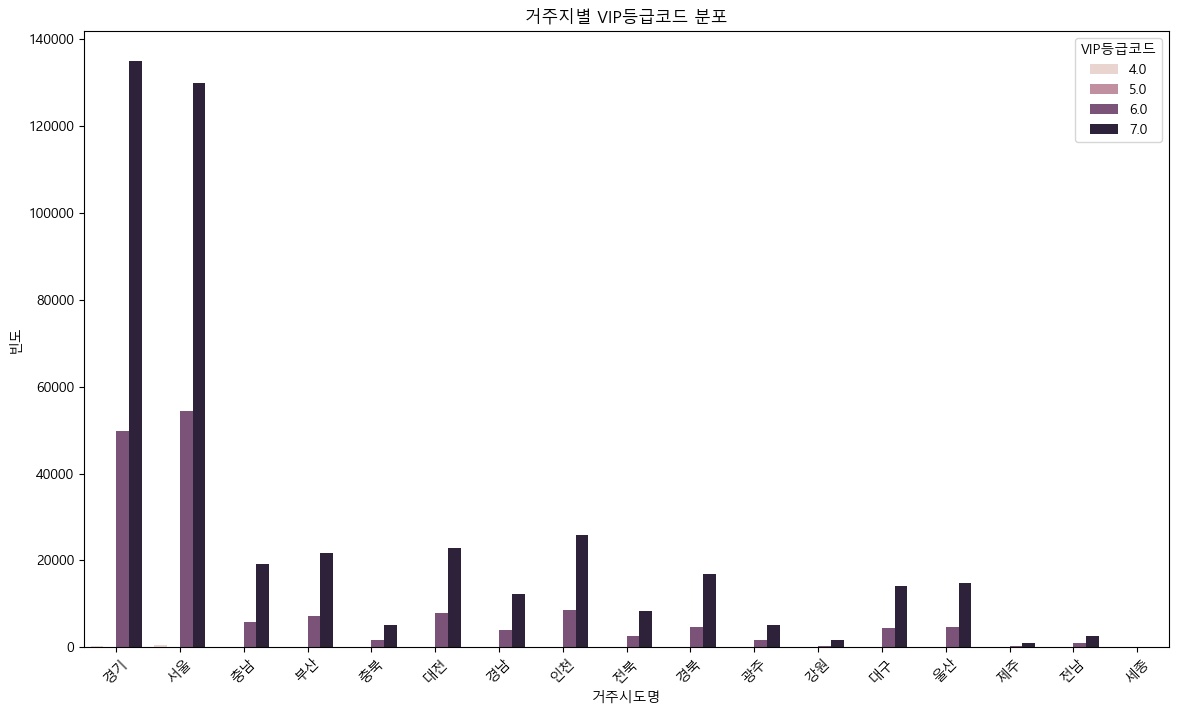

In [13]:
plt.figure(figsize=(14, 8))
sns.countplot(data=user, x='거주시도명', hue='VIP등급코드')
plt.title('거주지별 VIP등급코드 분포')
plt.xlabel('거주시도명')
plt.ylabel('빈도')
plt.xticks(rotation=45)
plt.legend(title='VIP등급코드')
plt.show()

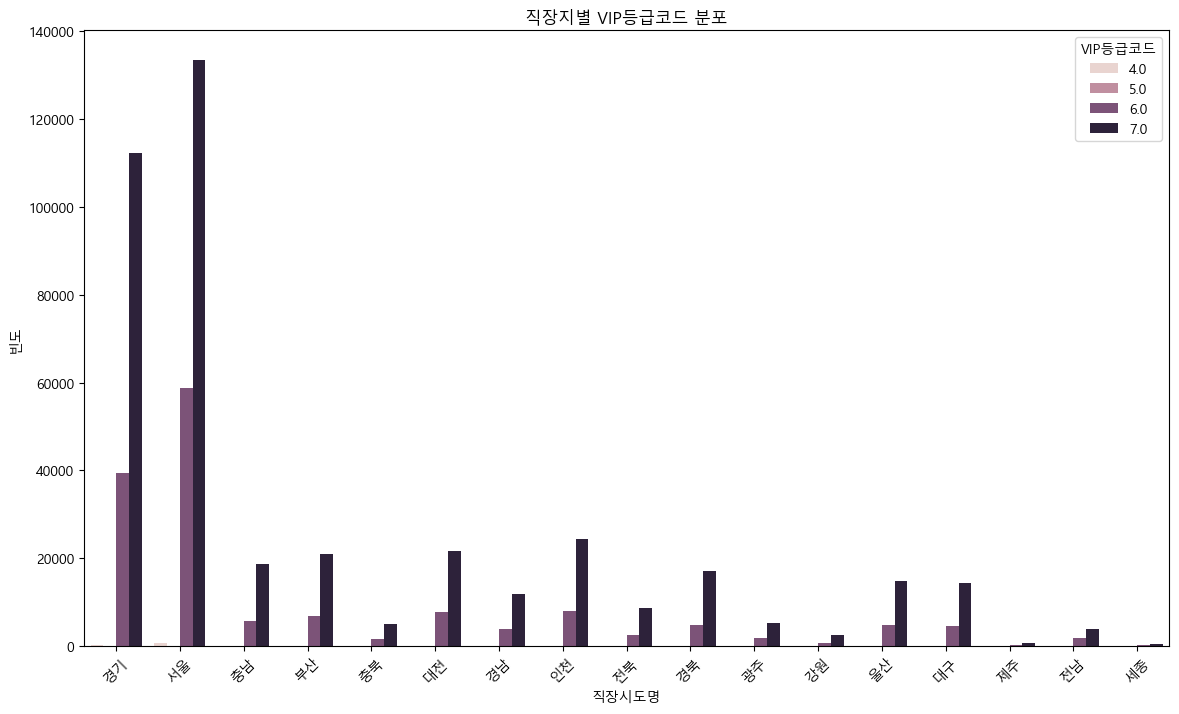

In [14]:
plt.figure(figsize=(14, 8))
sns.countplot(data=user, x='직장시도명', hue='VIP등급코드')
plt.title('직장지별 VIP등급코드 분포')
plt.xlabel('직장시도명')
plt.ylabel('빈도')
plt.xticks(rotation=45)
plt.legend(title='VIP등급코드')
plt.show()

In [15]:
user.VIP등급코드.value_counts()

VIP등급코드
7.0    436342
6.0    159393
4.0      1352
5.0       199
Name: count, dtype: int64

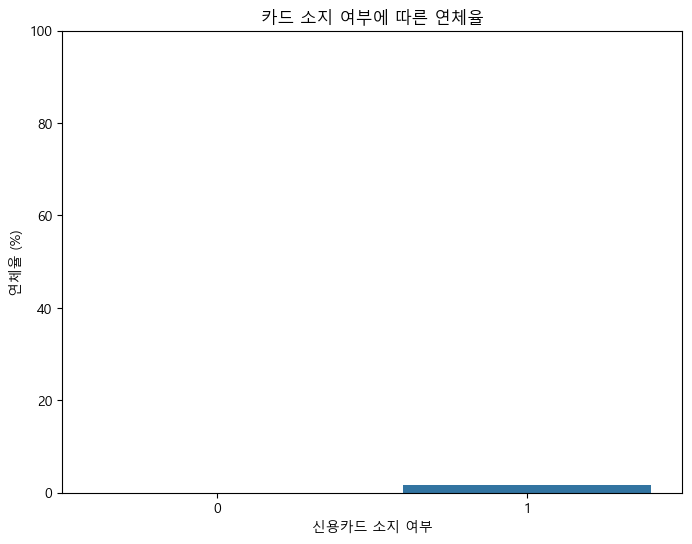

In [18]:
# 소지여부_신용별 연체율 계산 (연체회원 비율)
delinquency_rate = user.groupby('소지여부_신용')['회원여부_연체'].mean() * 100  # 연체율을 백분율로 표현

# 시각화
plt.figure(figsize=(8, 6))
sns.barplot(x=delinquency_rate.index, y=delinquency_rate.values)
plt.title('카드 소지 여부에 따른 연체율')
plt.xlabel('신용카드 소지 여부')
plt.ylabel('연체율 (%)')
plt.ylim(0, 100)  # 연체율은 최대 100%로 설정
plt.show()

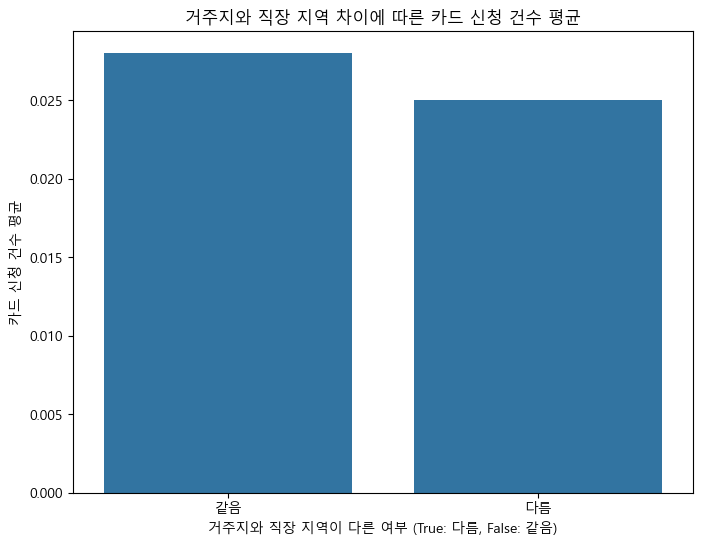

In [19]:
user['거주지_직장_차이'] = user['거주시도명'] != user['직장시도명']  # True면 다름, False면 같음

# 거주지와 직장 지역이 다른 여부에 따른 카드 신청 건수 평균 계산
application_counts = user.groupby('거주지_직장_차이')['카드신청건수'].mean()

# 시각화
plt.figure(figsize=(8, 6))
sns.barplot(x=application_counts.index, y=application_counts.values)
plt.title('거주지와 직장 지역 차이에 따른 카드 신청 건수 평균')
plt.xlabel('거주지와 직장 지역이 다른 여부 (True: 다름, False: 같음)')
plt.ylabel('카드 신청 건수 평균')
plt.xticks([0, 1], ['같음', '다름'])
plt.show()

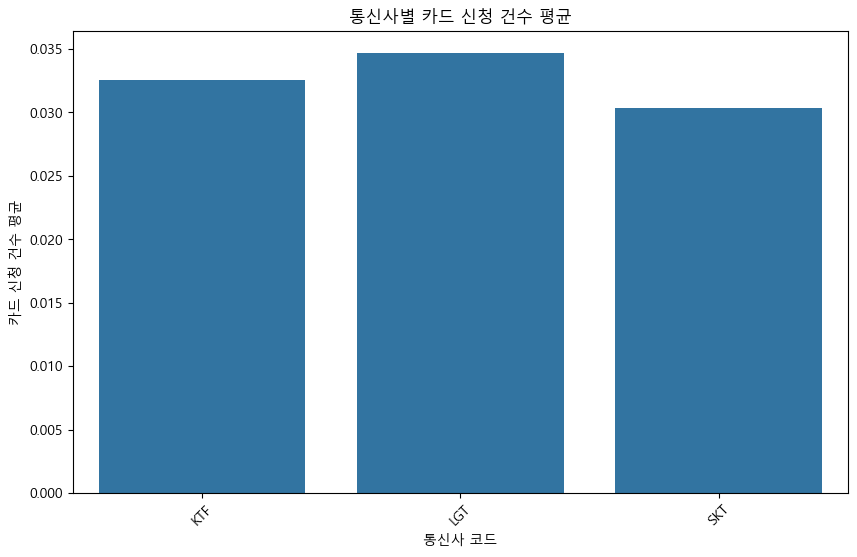

In [20]:
telco_application_counts = user.groupby('가입통신회사코드')['카드신청건수'].mean()

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=telco_application_counts.index, y=telco_application_counts.values)
plt.title('통신사별 카드 신청 건수 평균')
plt.xlabel('통신사 코드')
plt.ylabel('카드 신청 건수 평균')
plt.xticks(rotation=45)
plt.show()

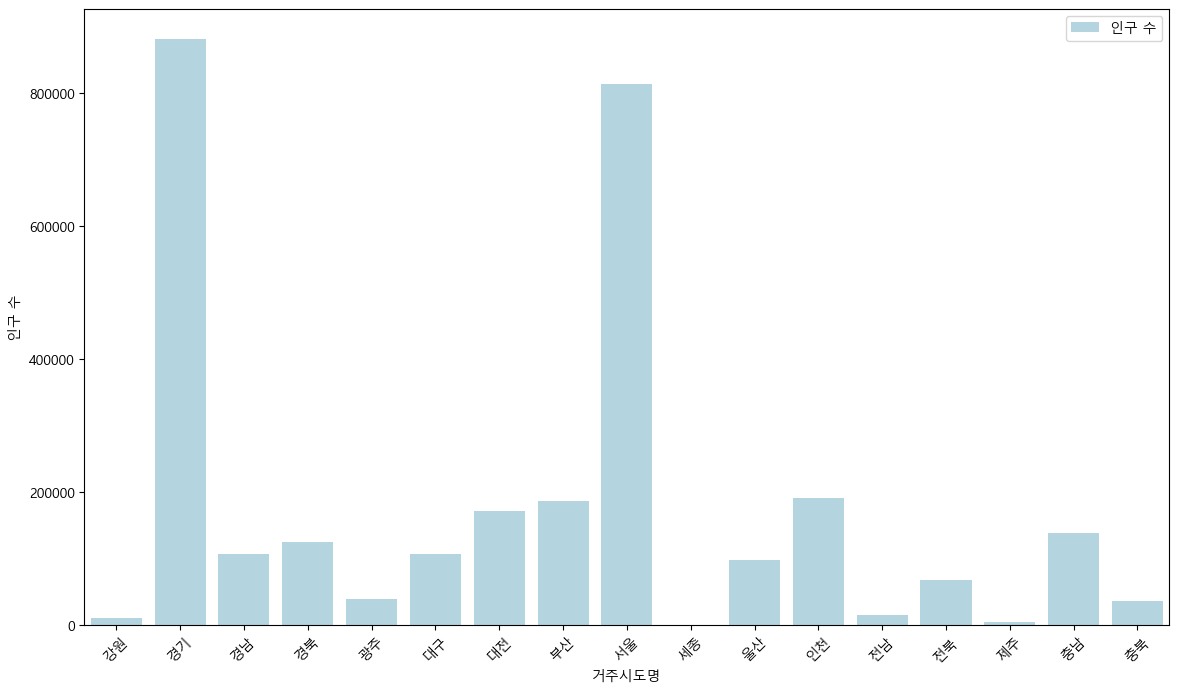

In [24]:


# 거주지별 인구 수(회원 수) 계산: 발급회원번호의 수로 인구 수 추정
population_counts = user.groupby('거주시도명')['발급회원번호'].count().reset_index()
population_counts.columns = ['거주시도명', '인구수']  # 인구수로 열 이름 변경

# 거주지별 카드 신청 건수 평균 계산
application_counts = user.groupby('거주시도명')['카드신청건수'].mean().reset_index()


# 인구 데이터와 카드 신청 건수 데이터를 병합
merged_data = pd.merge(application_counts, population_counts, on='거주시도명', how='left')

# 거주지별 카드 신청 건수 및 인구 수 시각화
plt.figure(figsize=(14, 8))
sns.barplot(x='거주시도명', y='인구수', data=merged_data, color='lightblue', label='인구 수')
#sns.barplot(x='거주시도명', y='카드신청건수', data=merged_data, color='orange', label='카드 신청 건수 평균')


plt.xlabel('거주시도명')
plt.ylabel('인구 수')
plt.xticks(rotation=45)
plt.legend()
plt.show()

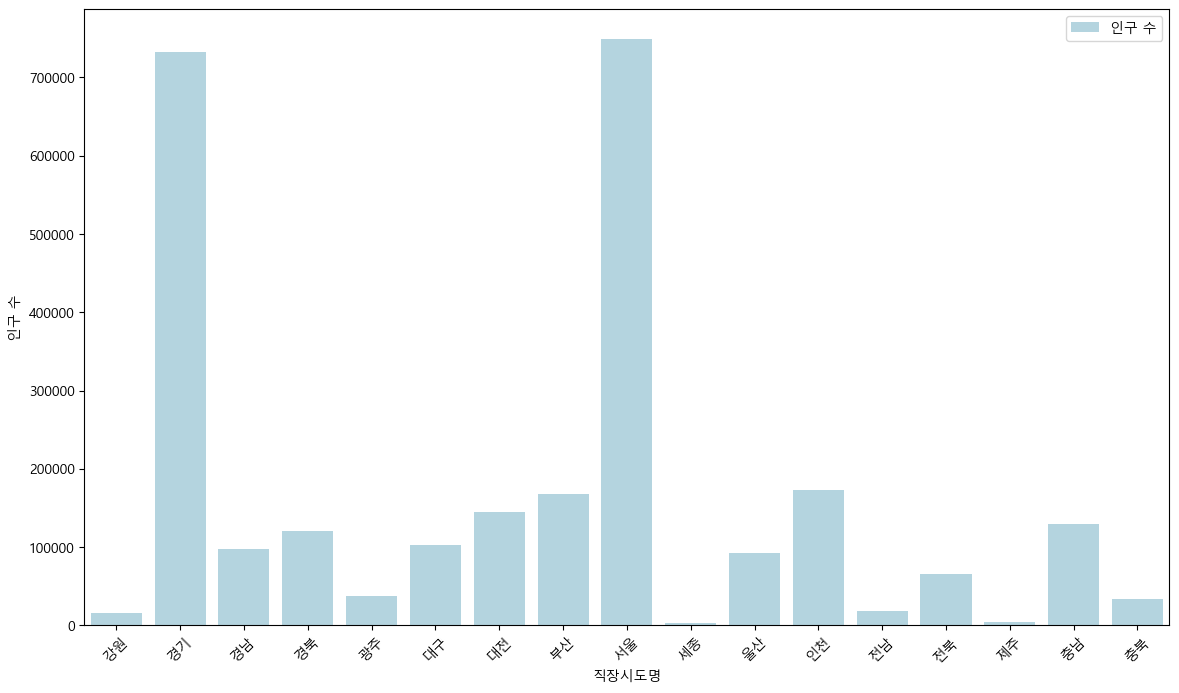

In [ ]:
# 직장지별 인구 수(회원 수) 계산: 발급회원번호의 수로 인구 수 추정
population_counts = user.groupby('직장시도명')['발급회원번호'].count().reset_index()
population_counts.columns = ['직장시도명', '인구수']  # 인구수로 열 이름 변경

# 직장지별 카드 신청 건수 평균 계산
application_counts = user.groupby('직장시도명')['카드신청건수'].mean().reset_index()

# 인구 데이터와 카드 신청 건수 데이터를 병합
merged_data = pd.merge(application_counts, population_counts, on='직장시도명', how='left')

# 직장지별 카드 신청 건수 및 인구 수 시각화
plt.figure(figsize=(14, 8))
sns.barplot(x='직장시도명', y='인구수', data=merged_data, color='lightblue', label='인구 수')

plt.xlabel('직장시도명')
plt.ylabel('인구 수')
plt.xticks(rotation=45)
plt.legend()
plt.show()